# Step-by-Step Introduction to t-SNE with Comparison to PCA

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*QpjYuYRWGd-8AfG9miAxJw.png" width="300"/>

In the world AI, a significant challenge is to analyze image datasets without any labels. When working with unlabeled image datasets, it can be challenging to understand the structure and relationships within the data.

## Techniques : 

1. PCA,  help in reducing the dimensionality of data while preserving its key features. 
2. t-SNE (t-Distributed Stochastic Neighbor Embedding), on the other hand, is a statistical method ideal for reducing high-dimensional data in a lower-dimensional space.


## tSNE

t-SNE is a machine learning algorithm for dimensionality reduction. It reduces high-dimensional data to a lower-dimensional space. The strength of t-SNE lies in its ability to maintain the local structure of the data. It does this by converting similarities between data points into joint probabilities and then minimizing the divergence between these probabilities in high-dimensional and low-dimensional space.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [3]:
# Create artificial high-dimensional dataset (5 dimensions)
X, y = make_blobs(n_samples=500, centers=3, n_features=5, random_state=42)

# Visualizing the original dataset shape
print(f"Original dataset shape: {X.shape}")

Original dataset shape: (500, 5)


In [4]:
# Apply t-SNE to reduce from 5D to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Check the reduced dimensions
print(f"t-SNE reduced dataset shape: {X_tsne.shape}")

t-SNE reduced dataset shape: (500, 2)


In [5]:
# Apply PCA to reduce from 5D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Check the PCA reduced dimensions
print(f"PCA reduced dataset shape: {X_pca.shape}")

PCA reduced dataset shape: (500, 2)



### Visualize the Results
We'll now visualize both the t-SNE and PCA results on two separate plots to compare how each method organizes the data.


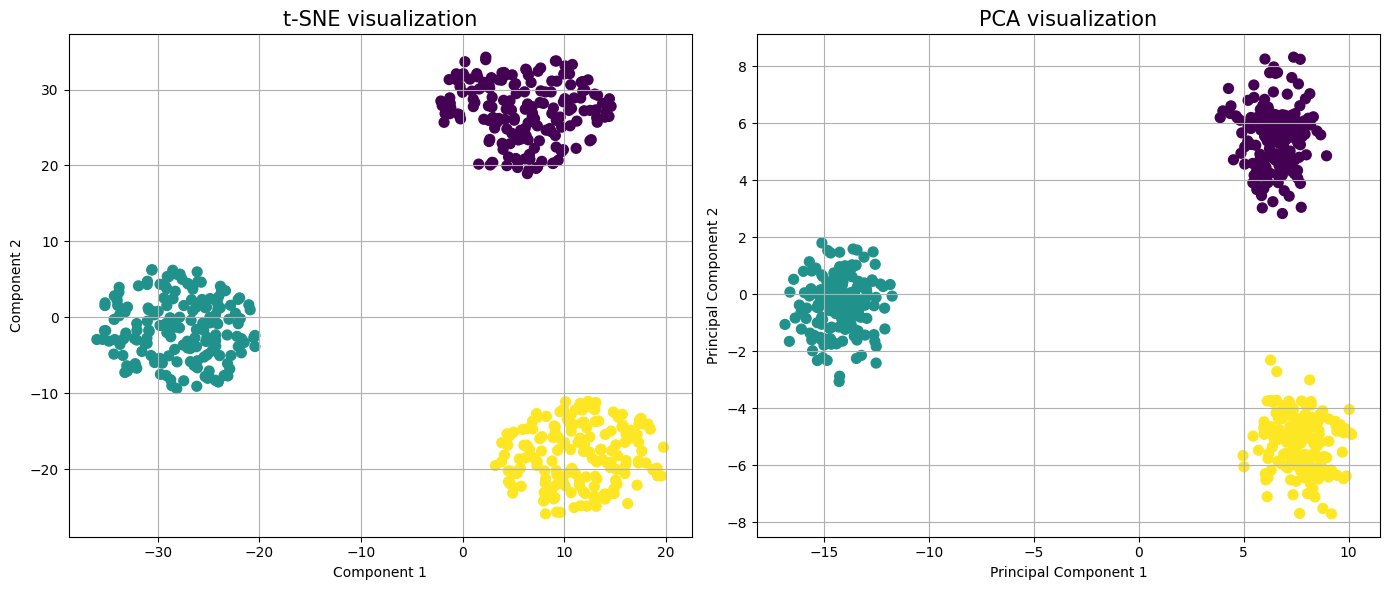

In [6]:
# Plot t-SNE results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50)
plt.title('t-SNE visualization', fontsize=15)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)

# Plot PCA results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title('PCA visualization', fontsize=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()


## Combining PCA and t-SNE for Image Data Exploration

First, a PCA is trained on the image dataset. This training involves learning to compress the image data into a lower-dimensional latent space while preserving its key features. The result is a more compact representation of each image, which encapsulates its essential characteristics.
After dimensionality reduction, t-SNE comes into play. The latent space representations, now significantly lower in dimensions thanks to PCA, are fed into t-SNE. This method maps these representations onto a two-dimensional feature plane in a way that similar images are placed close together.


## Task
For this example, we’ll use the MNIST handwritten digits dataset. This consists of 70,000 grayscale images of handwritten digits (0 to 9). The images are 28x28 pixels. Since the focus here is unsupervised analysis, we’ll pretend the digit labels are not available. We just have 70,000 unlabeled 28x28 pixel images.




10 primeras imagenes de prueba


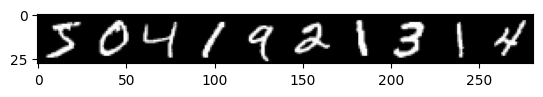

In [7]:

from sklearn.datasets import fetch_openml
# Cargar conjunto de datos MNIST
mnist = fetch_openml('mnist_784',parser='auto')
X = mnist.data / 255.0  # Normalize pixel values to 0-1 range
y = np.array(mnist.target).astype(int)
images =  np.zeros((28,1))
for i in range(10):
    image =np.array(X.iloc[i]).reshape((28,28))
    images=np.append(images,image,axis=1)
print("\n\n10 primeras imagenes de prueba")    
plt.imshow(images,cmap="gray"); 


**Apply PCA for Dimensionality Reduction:**

In [9]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
reduced_data.shape

(70000, 2)

**Perform K-Means Clustering:**

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)


**Visualize Clusters:**

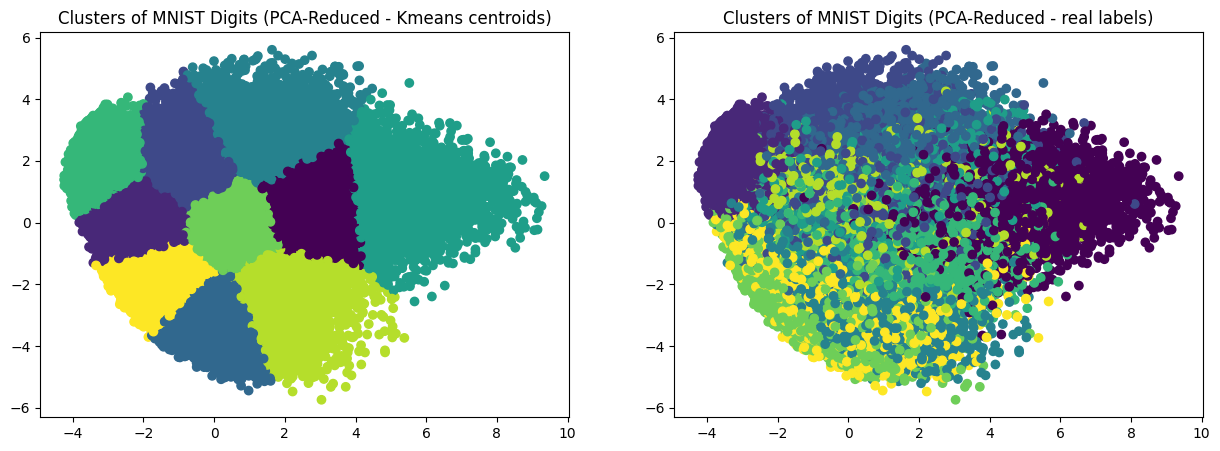

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced - Kmeans centroids)")


plt.subplot(122)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced - real labels)")
plt.show()

**PCA and t-SNE**

In [22]:
pca = PCA(n_components=0.8)  # Seleccionar el x% de la variabilidad
pca.fit(X )

# Extract features using the trained PCA
X_pca = pca.transform(X)
X_pca.shape

(70000, 43)

C:\Users\16079220\AppData\Local\Temp\ipykernel_29580\1738723306.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis')


Text(0, 0.5, 't-SNE 2')

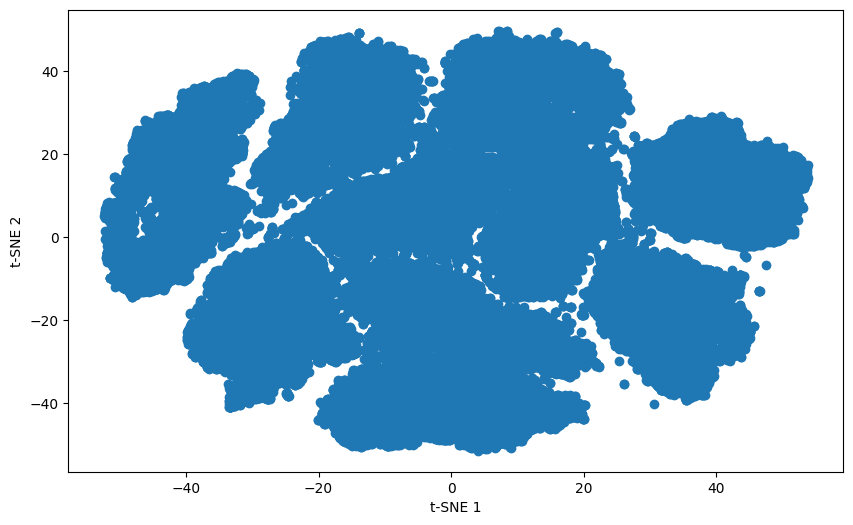

In [23]:
# Apply TSNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca')
tsne_features = tsne.fit_transform(X_pca)


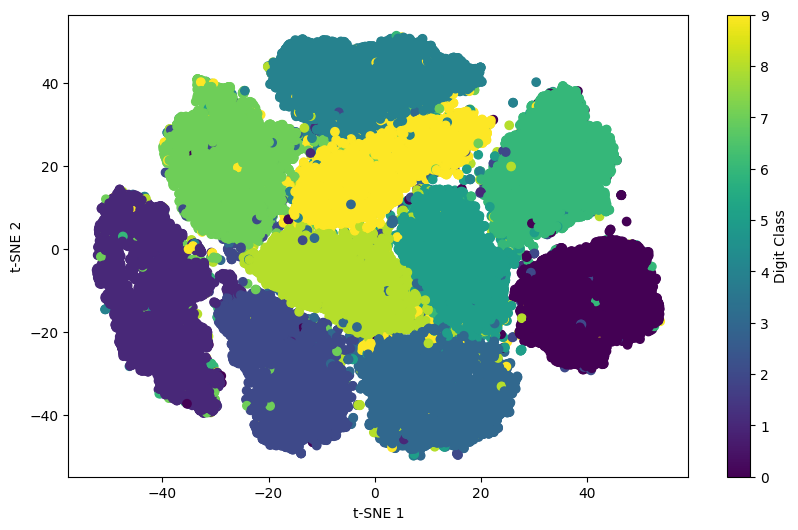

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
# Plot the TSNE results with label
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Digit Class')



array([5, 0, 4, ..., 4, 5, 6])

## Conclusion

In conclusion, the combination of PCA and tSNE offers a powerful tool for unlocking the secrets of unlabeled image datasets. By delving into the compressed representations and their low-dimensional projections, we can gain valuable insights into the structure, relationships, and anomalies within the data.